# Project 1
- 당뇨병 수치 예측

In [226]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = load_diabetes()
df_X = pd.DataFrame(data.data, columns=data.feature_names)
df_y = pd.Series(data.target, name='target')
df = pd.concat([df_X, df_y], axis=1)

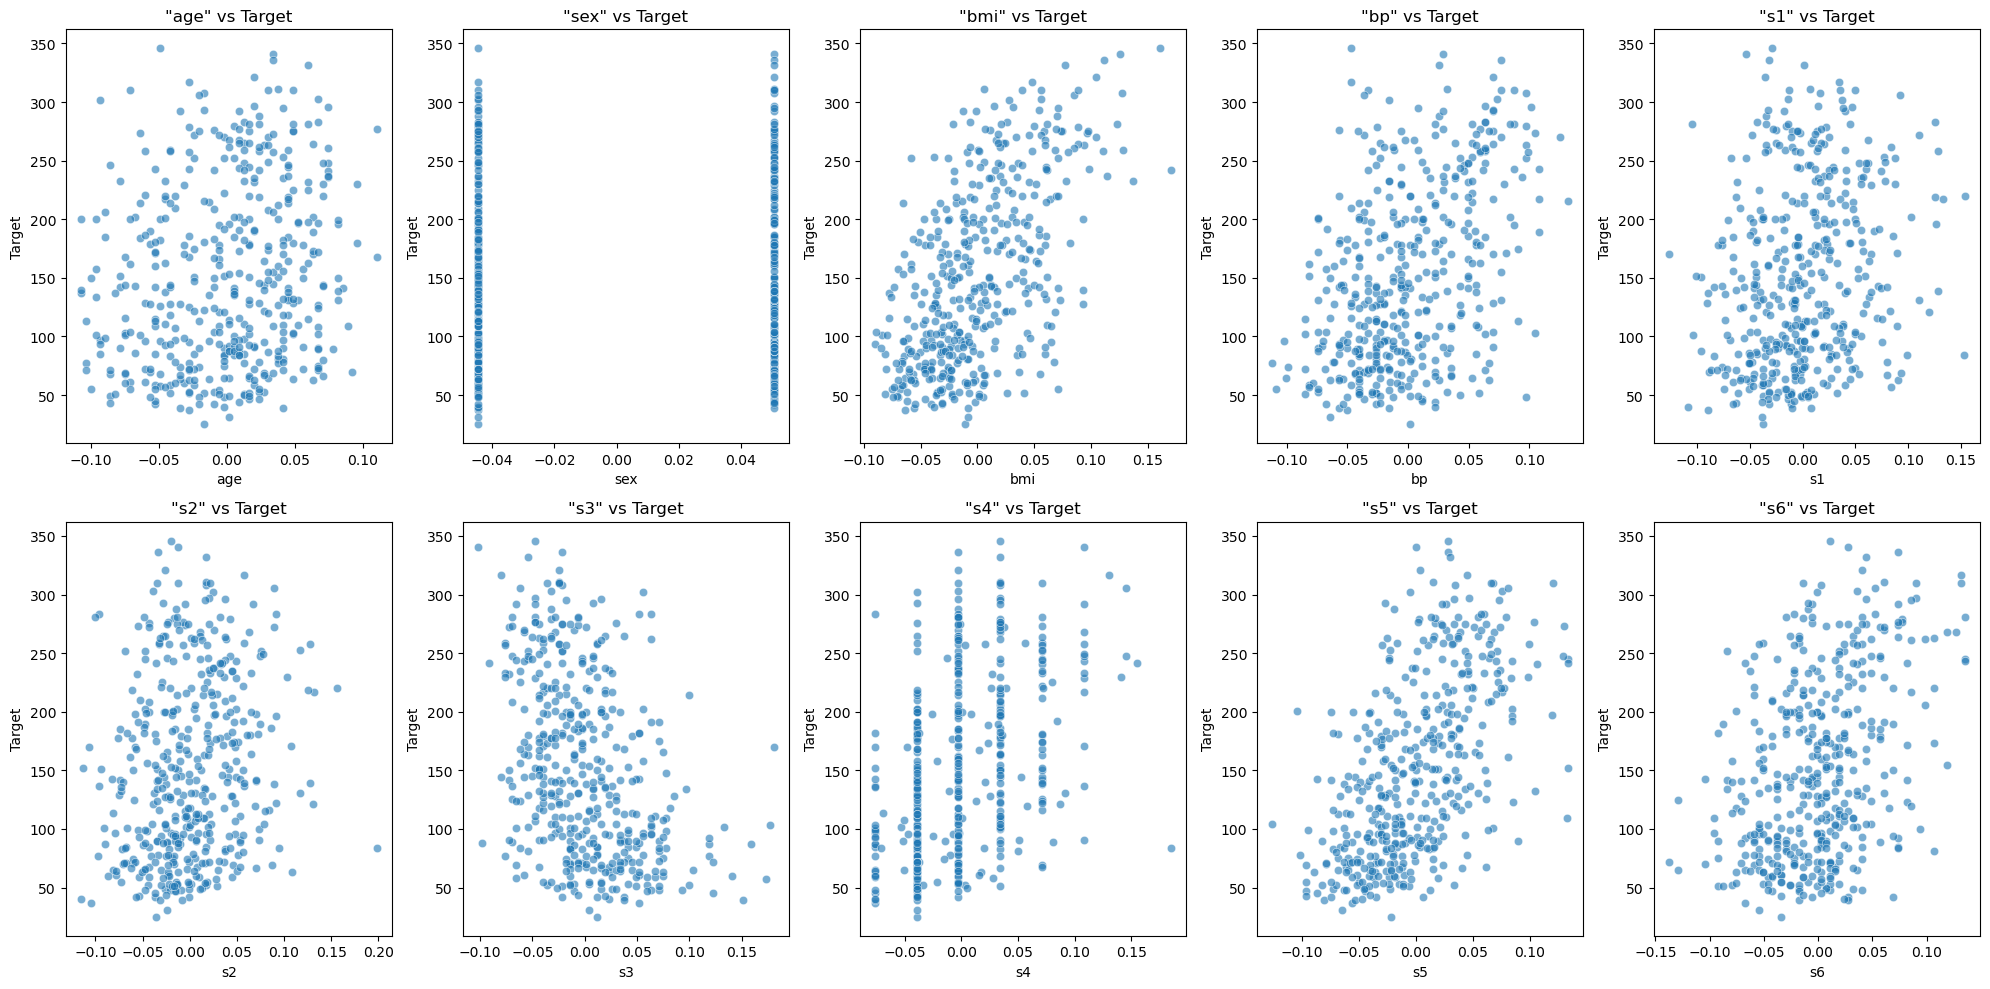

In [227]:
# 10개의 특성을 2x5 그리드에 그리기
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))

# axes를 1차원 배열로 만들어 순회하기 쉽게 함
axes = axes.flatten()

for i, col_name in enumerate(df_X.columns):
    sns.scatterplot(x=df_X[col_name], y=df_y, ax=axes[i], alpha=0.6)
    axes[i].set_title(f'"{col_name}" vs Target')
    axes[i].set_xlabel(col_name)
    axes[i].set_ylabel('Target')

plt.tight_layout() # 그래프 간 간격 자동 조절
plt.show()

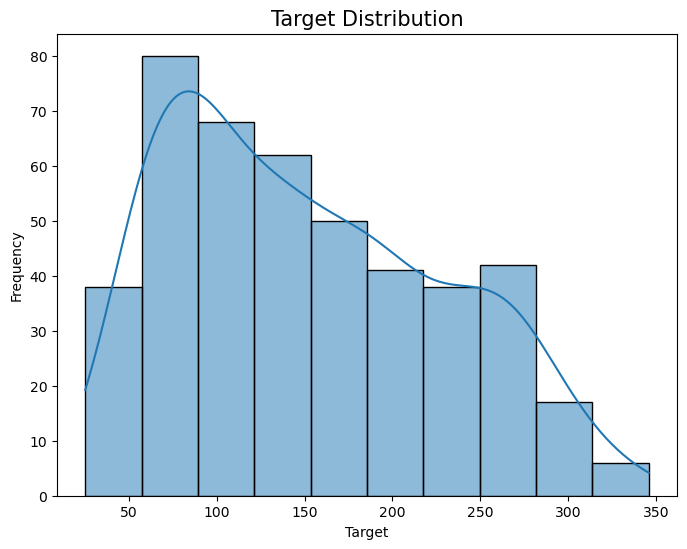

In [228]:
plt.figure(figsize=(8, 6))
sns.histplot(df_y, kde=True)
plt.title('Target Distribution', fontsize=15)
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()

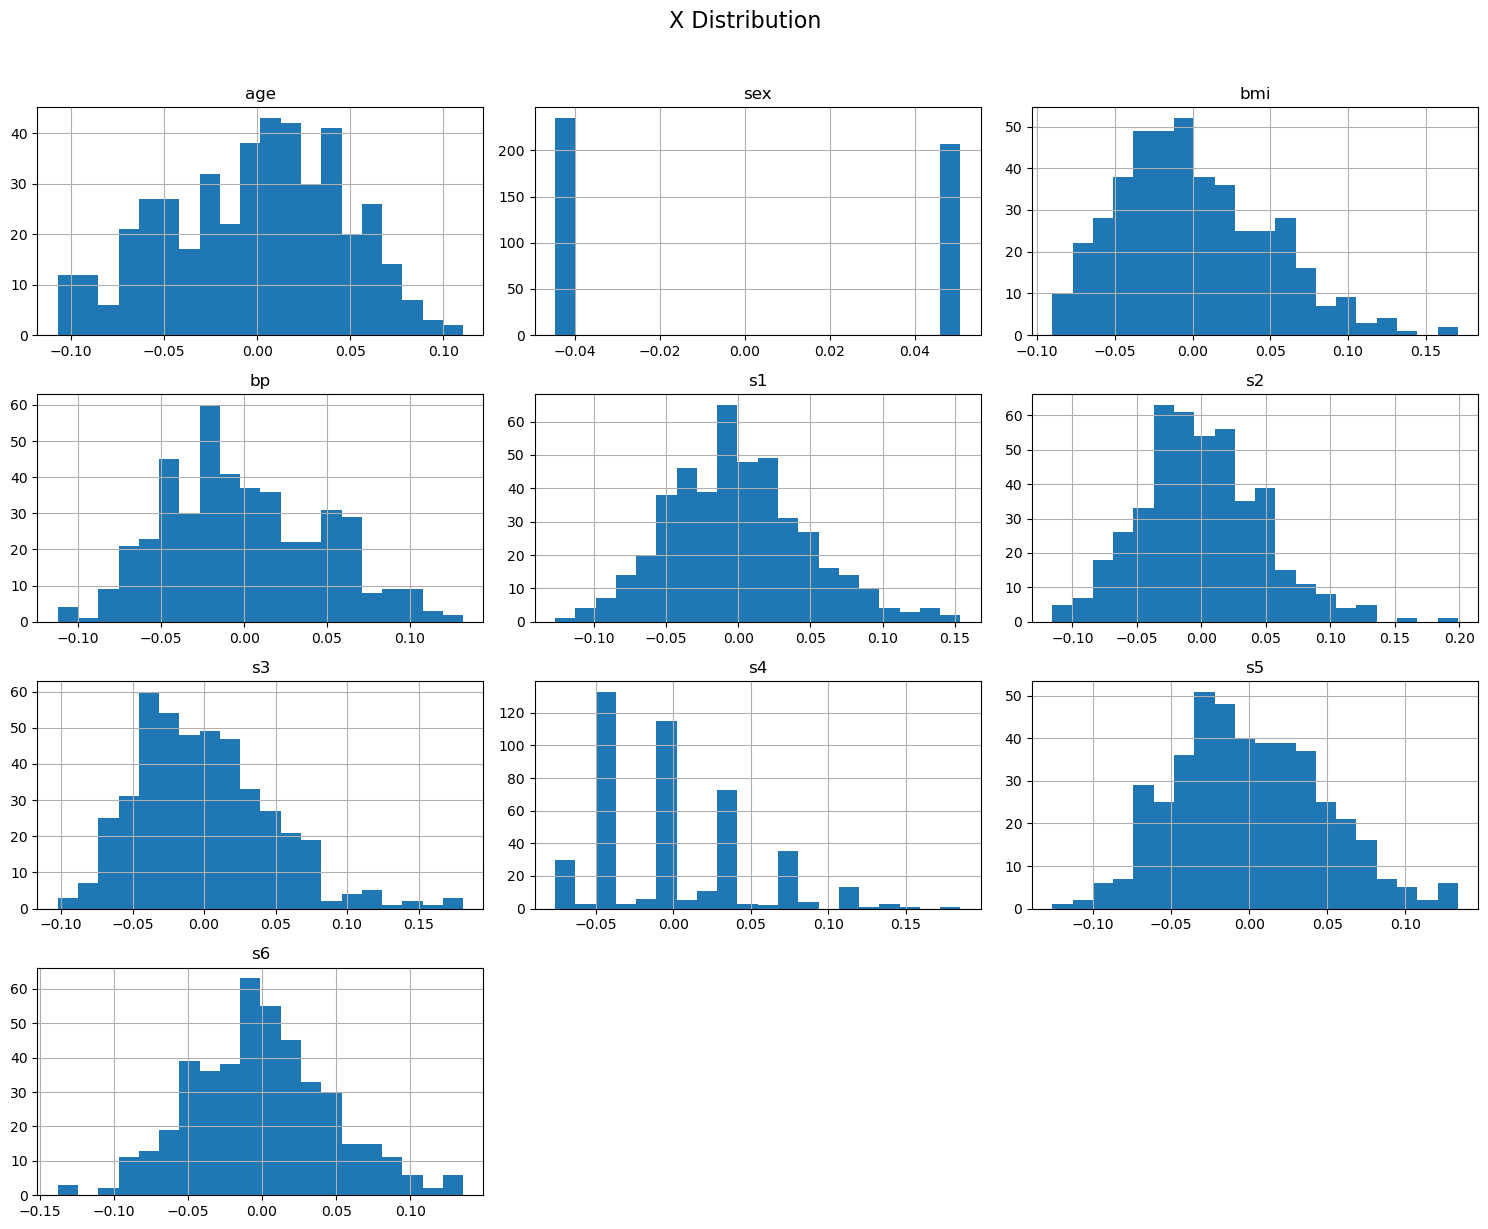

In [229]:
df_X.hist(figsize=(15, 12), bins=20)
plt.suptitle("X Distribution", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

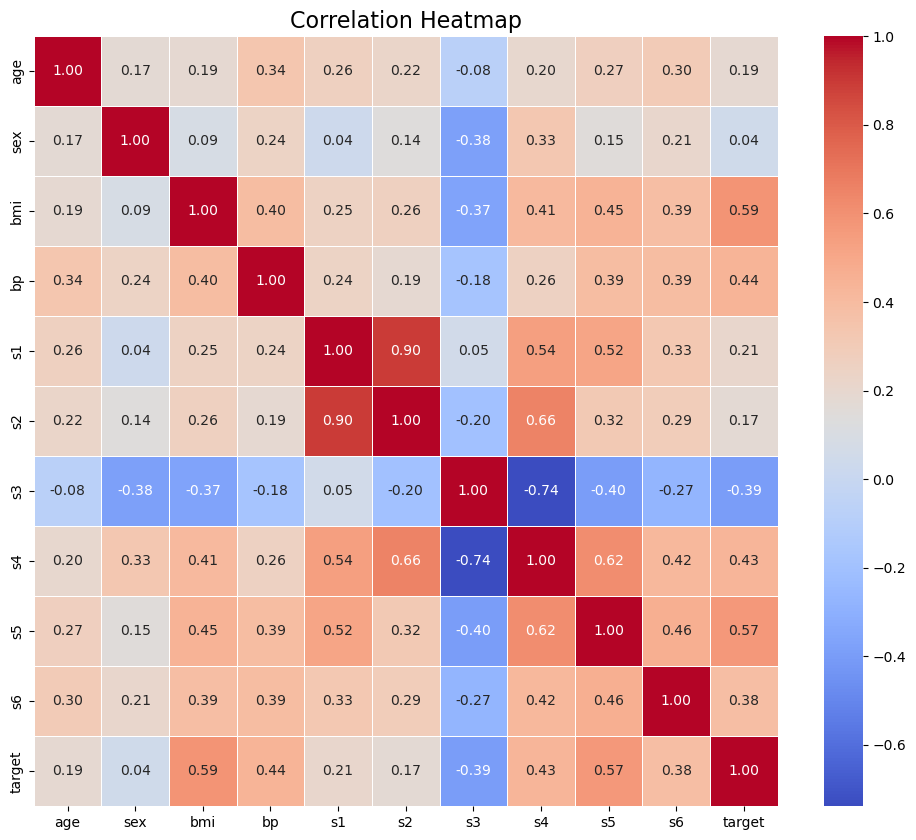

In [230]:
correlations = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(
    correlations, 
    annot=True,     # 각 셀에 숫자 표시
    cmap='coolwarm',# 색상 맵
    fmt='.2f',      # 소수점 둘째 자리까지 표시
    linewidths=.5   # 셀 사이의 간격
)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

In [231]:
df_X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [232]:
df_X.describe()

# 정규화는 이미 되어있는 것으로 보인다.
# 평균이 모두 0

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


In [233]:
X = np.array(df_X)
y = np.array(df_y)

print(X.shape, y.shape)

(442, 10) (442,)


In [234]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [235]:
y_mean, y_std = y_train.mean(), y_train.std()

print(f"y_train의 평균: {y_mean:.4f}")
print(f"y_train의 표준편차: {y_std:.4f}")

y_train_scaled = (y_train - y_mean) / y_std

y_train의 평균: 153.7365
y_train의 표준편차: 77.9513


In [257]:
correlations = []
num_features = X_train.shape[1] # X_train의 특성 개수 (10개)

for i in range(num_features):
    # i번째 특성 열과 y_train 사이의 피어슨 상관계수를 계산합니다.
    # np.corrcoef는 2x2 상관계수 행렬을 반환하며, [0, 1] 위치의 값이 두 변수 간의 상관계수입니다.
    corr = np.corrcoef(X_train[:, i], y_train)[0, 1]
    correlations.append(corr)

correlations = np.array(correlations)
correlations = np.abs(correlations)

print("X_train의 각 특성과 y_train의 상관계수")
print(correlations)

X_train의 각 특성과 y_train의 상관계수
[0.19650968 0.00711617 0.60475129 0.44477039 0.1995472  0.15492181
 0.38399951 0.42509412 0.55218311 0.39036312]


In [238]:
W = np.ones(X_train.shape[1])
b = 0

print(len(W), '\n', b) # W는 10개, b는 1개

10 
 0


In [253]:
def model(X, W, b):
    predictions = 0
    for i in range(len(W)):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

def mse_loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

def gradient_mse(X, W, b, y):
    N = len(y)

    y_pred = model(X, W, b)

    dW = 1/N * 2 * X.T.dot(y_pred - y)

    db = 2 * (y_pred - y).mean()
    return dW, db

def l2_loss(X, W, b, y, lam):
    predictions = model(X, W, b)
    mse = MSE(predictions, y)
    
    # 기존 MSE에 L2 페널티 항을 더함
    l2_penalty = lam * np.sum(W**2)
    L = mse + l2_penalty
    return L

def gradient_l2(X, W, b, y, lam):
    N = len(y)
    y_pred = model(X, W, b)

    # 기존 기울기 계산
    dW_mse = 1/N * 2 * X.T.dot(y_pred - y)
    db = 2 * (y_pred - y).mean() # db는 변경되지 않음

    # 기존 dW에 L2 페널티 항의 미분값을 더함
    dW = dW_mse + 2 * lam * W
    
    return dW, db

def l1_loss(X, W, b, y, lam):
    predictions = model(X, W, b)
    mse = MSE(predictions, y)
    
    # 기존 MSE에 L1 페널티 항을 더함
    l1_penalty = lam * np.sum(np.abs(W))
    L = mse + l1_penalty
    return L

def gradient_l1(X, W, b, y, lam):
    N = len(y)
    y_pred = model(X, W, b)

    # 기존 기울기 계산
    dW_mse = 1/N * 2 * X.T.dot(y_pred - y)
    db = 2 * (y_pred - y).mean() # db는 변경되지 않음

    # 기존 dW에 L1 페널티 항의 미분값을 더함
    dW = dW_mse + lam * np.sign(W)
    
    return dW, db

def evaluate():
    prediction_scaled = model(X_test, W, b)
    prediction = (prediction_scaled * y_std) + y_mean
    
    mse = MSE(prediction, y_test)
    print(f'Test MSE: {mse:.4f}')

### MSE Loss

In [254]:
W = np.ones(X_train.shape[1])
b = 0

LEARNING_RATE = 0.001
global W, b

losses = []

for i in range(1, 10001):
    dW, db = gradient(X_train, W, b, y_train_scaled)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train_scaled)
    losses.append(L)
    if i % 1000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

print(W)
print(b)

evaluate()

Iteration 1000 : Loss 0.8105
Iteration 2000 : Loss 0.8048
Iteration 3000 : Loss 0.7992
Iteration 4000 : Loss 0.7937
Iteration 5000 : Loss 0.7884
Iteration 6000 : Loss 0.7832
Iteration 7000 : Loss 0.7782
Iteration 8000 : Loss 0.7732
Iteration 9000 : Loss 0.7684
Iteration 10000 : Loss 0.7637
[1.04853043 0.92097084 1.41014404 1.26887939 0.99016759 0.96776188
 0.72058978 1.2178326  1.33278613 1.19796854]
-0.007820595642613119
Test MSE: 4001.2287


### L1 Loss

In [255]:
LEARNING_RATE = 0.001
LAMBDA = 0.1 
global W, b

losses = []

for i in range(1, 10001):
    dW, db = gradient_l1(X_train, W, b, y_train_scaled, LAMBDA)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = l1_loss(X_train, W, b, y_train_scaled, LAMBDA)
    losses.append(L)
    if i % 1000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

print(W)
print(b)

evaluate()

Iteration 1000 : Loss 1.7868
Iteration 2000 : Loss 1.7041
Iteration 3000 : Loss 1.6231
Iteration 4000 : Loss 1.5438
Iteration 5000 : Loss 1.4661
Iteration 6000 : Loss 1.3955
Iteration 7000 : Loss 1.3375
Iteration 8000 : Loss 1.2812
Iteration 9000 : Loss 1.2292
Iteration 10000 : Loss 1.1867
[ 1.41314097e-01  5.96376593e-05  8.48415324e-01  5.76922274e-01
  4.94841440e-02 -1.10065675e-05  1.60494521e-05  4.79989443e-01
  7.08940833e-01  4.39865195e-01]
-0.004404372420951664
Test MSE: 4610.7579


### L2 Loss

In [256]:
W = np.ones(X_train.shape[1])
b = 0

LEARNING_RATE = 0.001
LAMBDA = 0.1 
global W, b

losses = []

for i in range(1, 10001):
    dW, db = gradient_l2(X_train, W, b, y_train_scaled, LAMBDA)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = l2_loss(X_train, W, b, y_train_scaled, LAMBDA)
    losses.append(L)
    if i % 1000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

print(W)
print(b)

evaluate()

Iteration 1000 : Loss 1.5243
Iteration 2000 : Loss 1.3331
Iteration 3000 : Loss 1.2078
Iteration 4000 : Loss 1.1257
Iteration 5000 : Loss 1.0719
Iteration 6000 : Loss 1.0367
Iteration 7000 : Loss 1.0136
Iteration 8000 : Loss 0.9984
Iteration 9000 : Loss 0.9885
Iteration 10000 : Loss 0.9819
[ 0.1930049   0.12474992  0.35491021  0.29504482  0.18619803  0.17057333
 -0.00532578  0.27918897  0.33091948  0.26888576]
-0.002101694722903355
Test MSE: 4915.1029


- L1, L2 정규화는 효과가 없음

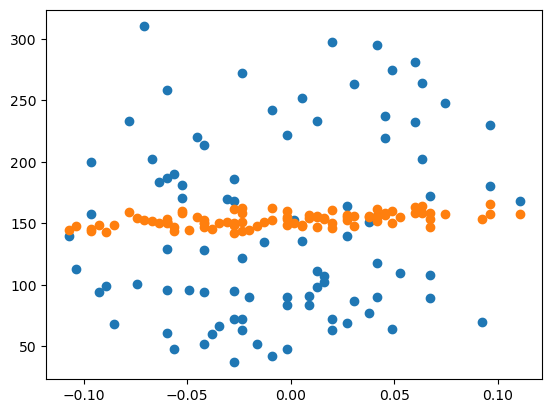

In [220]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

### 파생변수 추가

In [259]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = load_diabetes()
df_X = pd.DataFrame(data.data, columns=data.feature_names)
df_y = pd.Series(data.target, name='target')
df = pd.concat([df_X, df_y], axis=1)

### 데이터셋 설명

- age     age in years
- sex
- bmi     body mass index
- bp      average blood pressure
- s1      tc, total serum cholesterol
- s2      ldl, low-density lipoproteins
- s3      hdl, high-density lipoproteins
- s4      tch, total cholesterol / HDL
- s5      ltg, possibly log of serum triglycerides level
- s6      glu, blood sugar level

In [262]:
df_X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [269]:
df_X['age_bmi'] = df_X['age'] * df_X['bmi']
df_X['bmi_s6'] = df_X['bmi'] * df_X['s6']
df_X['bp_s6'] = df_X['bp'] * df_X['s6']

df_X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,age_bmi,bp_s6,bmi_s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,0.002349,-0.000386,-0.001089
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,0.000097,0.002428,0.004746
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,0.003792,0.000147,-0.001153
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,0.001033,0.000343,0.000109
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,-0.000196,-0.001020,0.001697


In [270]:
X = np.array(df_X)
y = np.array(df_y)

print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(442, 13) (442,)
(353, 13) (353,)
(89, 13) (89,)


In [271]:
y_mean, y_std = y_train.mean(), y_train.std()

print(f"y_train의 평균: {y_mean:.4f}")
print(f"y_train의 표준편차: {y_std:.4f}")

y_train_scaled = (y_train - y_mean) / y_std

y_train의 평균: 153.7365
y_train의 표준편차: 77.9513


In [285]:
W = np.ones(X_train.shape[1])
b = 0

LEARNING_RATE = 0.001
global W, b

losses = []

for i in range(1, 10001):
    dW, db = gradient(X_train, W, b, y_train_scaled)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train_scaled)
    losses.append(L)
    if i % 1000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

print(W)
print(b)

evaluate()

Iteration 1000 : Loss 0.8094
Iteration 2000 : Loss 0.8036
Iteration 3000 : Loss 0.7981
Iteration 4000 : Loss 0.7926
Iteration 5000 : Loss 0.7873
Iteration 6000 : Loss 0.7821
Iteration 7000 : Loss 0.7770
Iteration 8000 : Loss 0.7721
Iteration 9000 : Loss 0.7673
Iteration 10000 : Loss 0.7626
[1.04922356 0.92100111 1.41028076 1.26865586 0.99094415 0.96869347
 0.7209056  1.21799765 1.33272348 1.19807543 1.00068811 1.00303977
 1.00713826]
-0.010040369507819476
Test MSE: 3992.2737


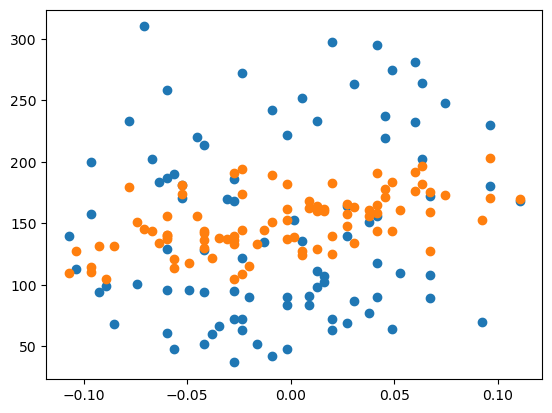

In [284]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

- 4001.2287에서 3992.2737로 소폭 개선됨
- loss가 계속해서 감소하는 것을 보니 더 개선될 여지가 많음, >> lr, epoch을 늘리자

In [288]:
W = np.ones(X_train.shape[1])
b = 0

LEARNING_RATE = 0.005
global W, b

losses = []

for i in range(1, 100001):
    dW, db = gradient(X_train, W, b, y_train_scaled)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train_scaled)
    losses.append(L)
    if i % 5000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

print(W)
print(b)

evaluate()

Iteration 5000 : Loss 0.7038
Iteration 10000 : Loss 0.6390
Iteration 15000 : Loss 0.5977
Iteration 20000 : Loss 0.5692
Iteration 25000 : Loss 0.5485
Iteration 30000 : Loss 0.5330
Iteration 35000 : Loss 0.5211
Iteration 40000 : Loss 0.5119
Iteration 45000 : Loss 0.5047
Iteration 50000 : Loss 0.4990
Iteration 55000 : Loss 0.4945
Iteration 60000 : Loss 0.4910
Iteration 65000 : Loss 0.4882
Iteration 70000 : Loss 0.4859
Iteration 75000 : Loss 0.4841
Iteration 80000 : Loss 0.4826
Iteration 85000 : Loss 0.4815
Iteration 90000 : Loss 0.4805
Iteration 95000 : Loss 0.4797
Iteration 100000 : Loss 0.4791
[ 0.54157299 -2.41314365  6.6825973   4.10922607 -1.22146598 -1.46396323
 -2.16178366  2.24873166  4.88649476  1.44404651  1.08954392  1.07369524
  1.21641402]
-0.0328080247217939
Test MSE: 2859.7739


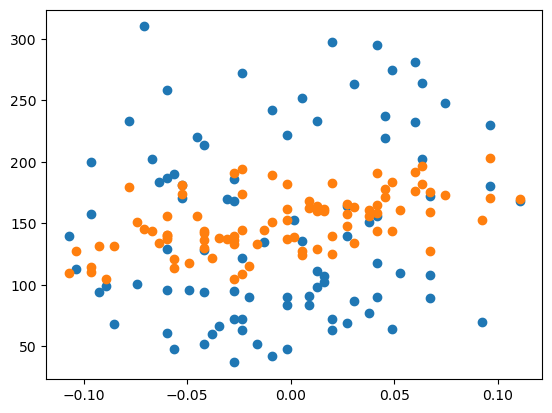

In [289]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

- LEARNING_RATE를 0.05로, epoch을 100000으로 늘리니 Test MSE가 확연히 줄음
- 학습이 끝까지 안된 것이 가장 큰 듯함.

# Project 2
- 자전거 수요 예측

In [299]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

train = pd.read_csv("~/data/data/bike-sharing-demand/train.csv") 

train['datetime'] = pd.to_datetime(train['datetime'])
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int32         
 13  month       10886 non-null  int32         
 14  day         10886 non-null  int32         
 15  hour        10886 non-null  int32         
 16  minute      10886 non-

In [300]:
features = ['year', 'month', 'day', 'hour', 'temp', 'humidity', 'windspeed']
X = train[features]
y = train['count']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8708, 7) (8708,)
(2178, 7) (2178,)


In [304]:
X_train.head()

,year,month,day,hour,temp,humidity,windspeed
2815,2011,7,6,5,27.88,83,6.0032
8695,2012,8,4,16,36.90,39,19.9995
8406,2012,7,11,15,32.80,41,16.9979
1543,2011,4,10,4,14.76,93,7.0015
4952,2011,11,19,10,13.12,45,16.9979


In [301]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [302]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MSE:", mse)
print("RMSE:", rmse)

MSE: 19961.901814435438
RMSE: 141.2865946027274


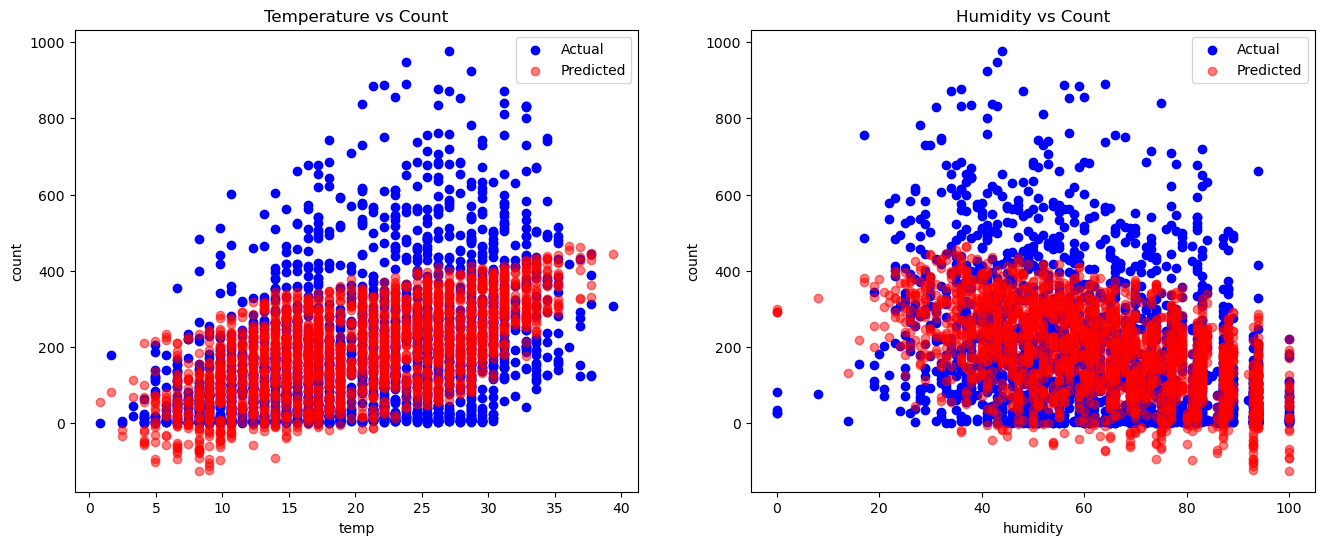

In [303]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# temp vs count 시각화
axs[0].scatter(X_test['temp'], y_test, color='blue', label='Actual')
axs[0].scatter(X_test['temp'], y_pred, color='red', label='Predicted', alpha=0.5)
axs[0].set_xlabel('temp')
axs[0].set_ylabel('count')
axs[0].set_title('Temperature vs Count')
axs[0].legend()

# humidity vs count 시각화
axs[1].scatter(X_test['humidity'], y_test, color='blue', label='Actual')
axs[1].scatter(X_test['humidity'], y_pred, color='red', label='Predicted', alpha=0.5)
axs[1].set_xlabel('humidity')
axs[1].set_ylabel('count')
axs[1].set_title('Humidity vs Count')
axs[1].legend()